In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text

In [2]:
train = pd.read_excel('lendingclubtraindata.xlsx')
validation = pd.read_excel('lendingclubvaldata.xlsx')
test = pd.read_excel('lendingclubtestdata.xlsx')

In [4]:
train, validation, test

(      home_ownership    income    dti  fico  loan_status
 0                  1   44304.0  18.47   690            0
 1                  0   50000.0  29.62   735            1
 2                  0   64400.0  16.68   675            1
 3                  0   38500.0  33.73   660            0
 4                  1  118000.0  26.66   665            1
 ...              ...       ...    ...   ...          ...
 6995               1  180000.0  14.60   665            1
 6996               1   32000.0  20.33   745            1
 6997               1   80000.0  11.68   690            1
 6998               0   37921.0  32.85   705            0
 6999               1   60000.0  15.56   680            1
 
 [7000 rows x 5 columns],
       homw_ownership     income    dti  fico  loan_status
 0                  0   25000.00  27.60   660            0
 1                  0   50000.00  21.51   715            1
 2                  1  100000.00   8.14   770            1
 3                  0   75000.00   1.76 

In [5]:
# store target column

y_train = train['loan_status']
y_validation = validation['loan_status']
y_test = test['loan_status']

### Using the data from the training data set calculate the initial entropy of the dataset using the empirical probability that the loan is paid of.

In [24]:
prob_1 = len(y_train[y_train == 1])/len(y_train)
prob_2 = 1.0 - prob_1

initial_entropy = -prob_1*np.log2(prob_1)-prob_2*np.log2(prob_2)

print("Initial entropy=", initial_entropy)

Initial entropy= 0.7381931419673073


### Calculate the information gain (i.e. reduction in expected entropy) if the home ownership feature is used to build a simple classification tree.

In [9]:
# From the dataset we have that 60.40% own their home and 39.60% rent

home_owners = train[train.home_ownership == 1]
home_owner_prob = len(home_owners)/len(y_train)

print("Prob own home=", home_owner_prob)

Prob own home= 0.604


In [11]:
# Loans were fully paid for 81.72 % of those who owned their home

home_owners_paid = home_owners[home_owners.loan_status == 1]
prob_home_owner_paid = len(home_owners_paid)/len(home_owners)

print("Prob own home and paid=", prob_home_owner_paid)

Prob own home and paid= 0.8171712393566698


In [12]:
# 75.29% of those who rented paid their loans

home_rent = train[train.home_ownership == 0]
home_rent_paid = home_rent[home_rent.loan_status == 1]
prob_home_rent_paid = len(home_rent_paid)/len(home_rent)

print("Prob own rent and paid=", prob_home_rent_paid)

Prob own rent and paid= 0.7528860028860029


In [23]:
# Calculating the entropy 

entropy = home_owner_prob * ((-prob_home_owner_paid * np.log2(prob_home_owner_paid)) - ((1-prob_home_owner_paid) * np.log2(1-prob_home_owner_paid))) + (1-home_owner_prob) * ((-prob_home_rent_paid * np.log2(prob_home_rent_paid)) - ((1-prob_home_rent_paid) * np.log2(1-prob_home_rent_paid)))

entropy

0.7339227576378262

In [25]:
# So the reduction in entropy if we use this feature is

initial_entropy - entropy

0.004270384329481125

### Use the DecisionTreeClassifier from the Python library sklearn to produce a decision tree. Experiment with different parameters. 

Use the parameters: criterion=’entropy’,max depth=4,min samples split=1000,min samples leaf=200,random state=0,to produce an initial tree.

In [28]:
# remove target column to create feature only dataset

X_train = train.drop('loan_status', axis=1)
X_val = validation.drop('loan_status', axis=1)
X_test = test.drop('loan_status', axis=1)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=4,
                            min_samples_split=1000, min_samples_leaf=200,
                            random_state=0)

clf = clf.fit(X_train, y_train)

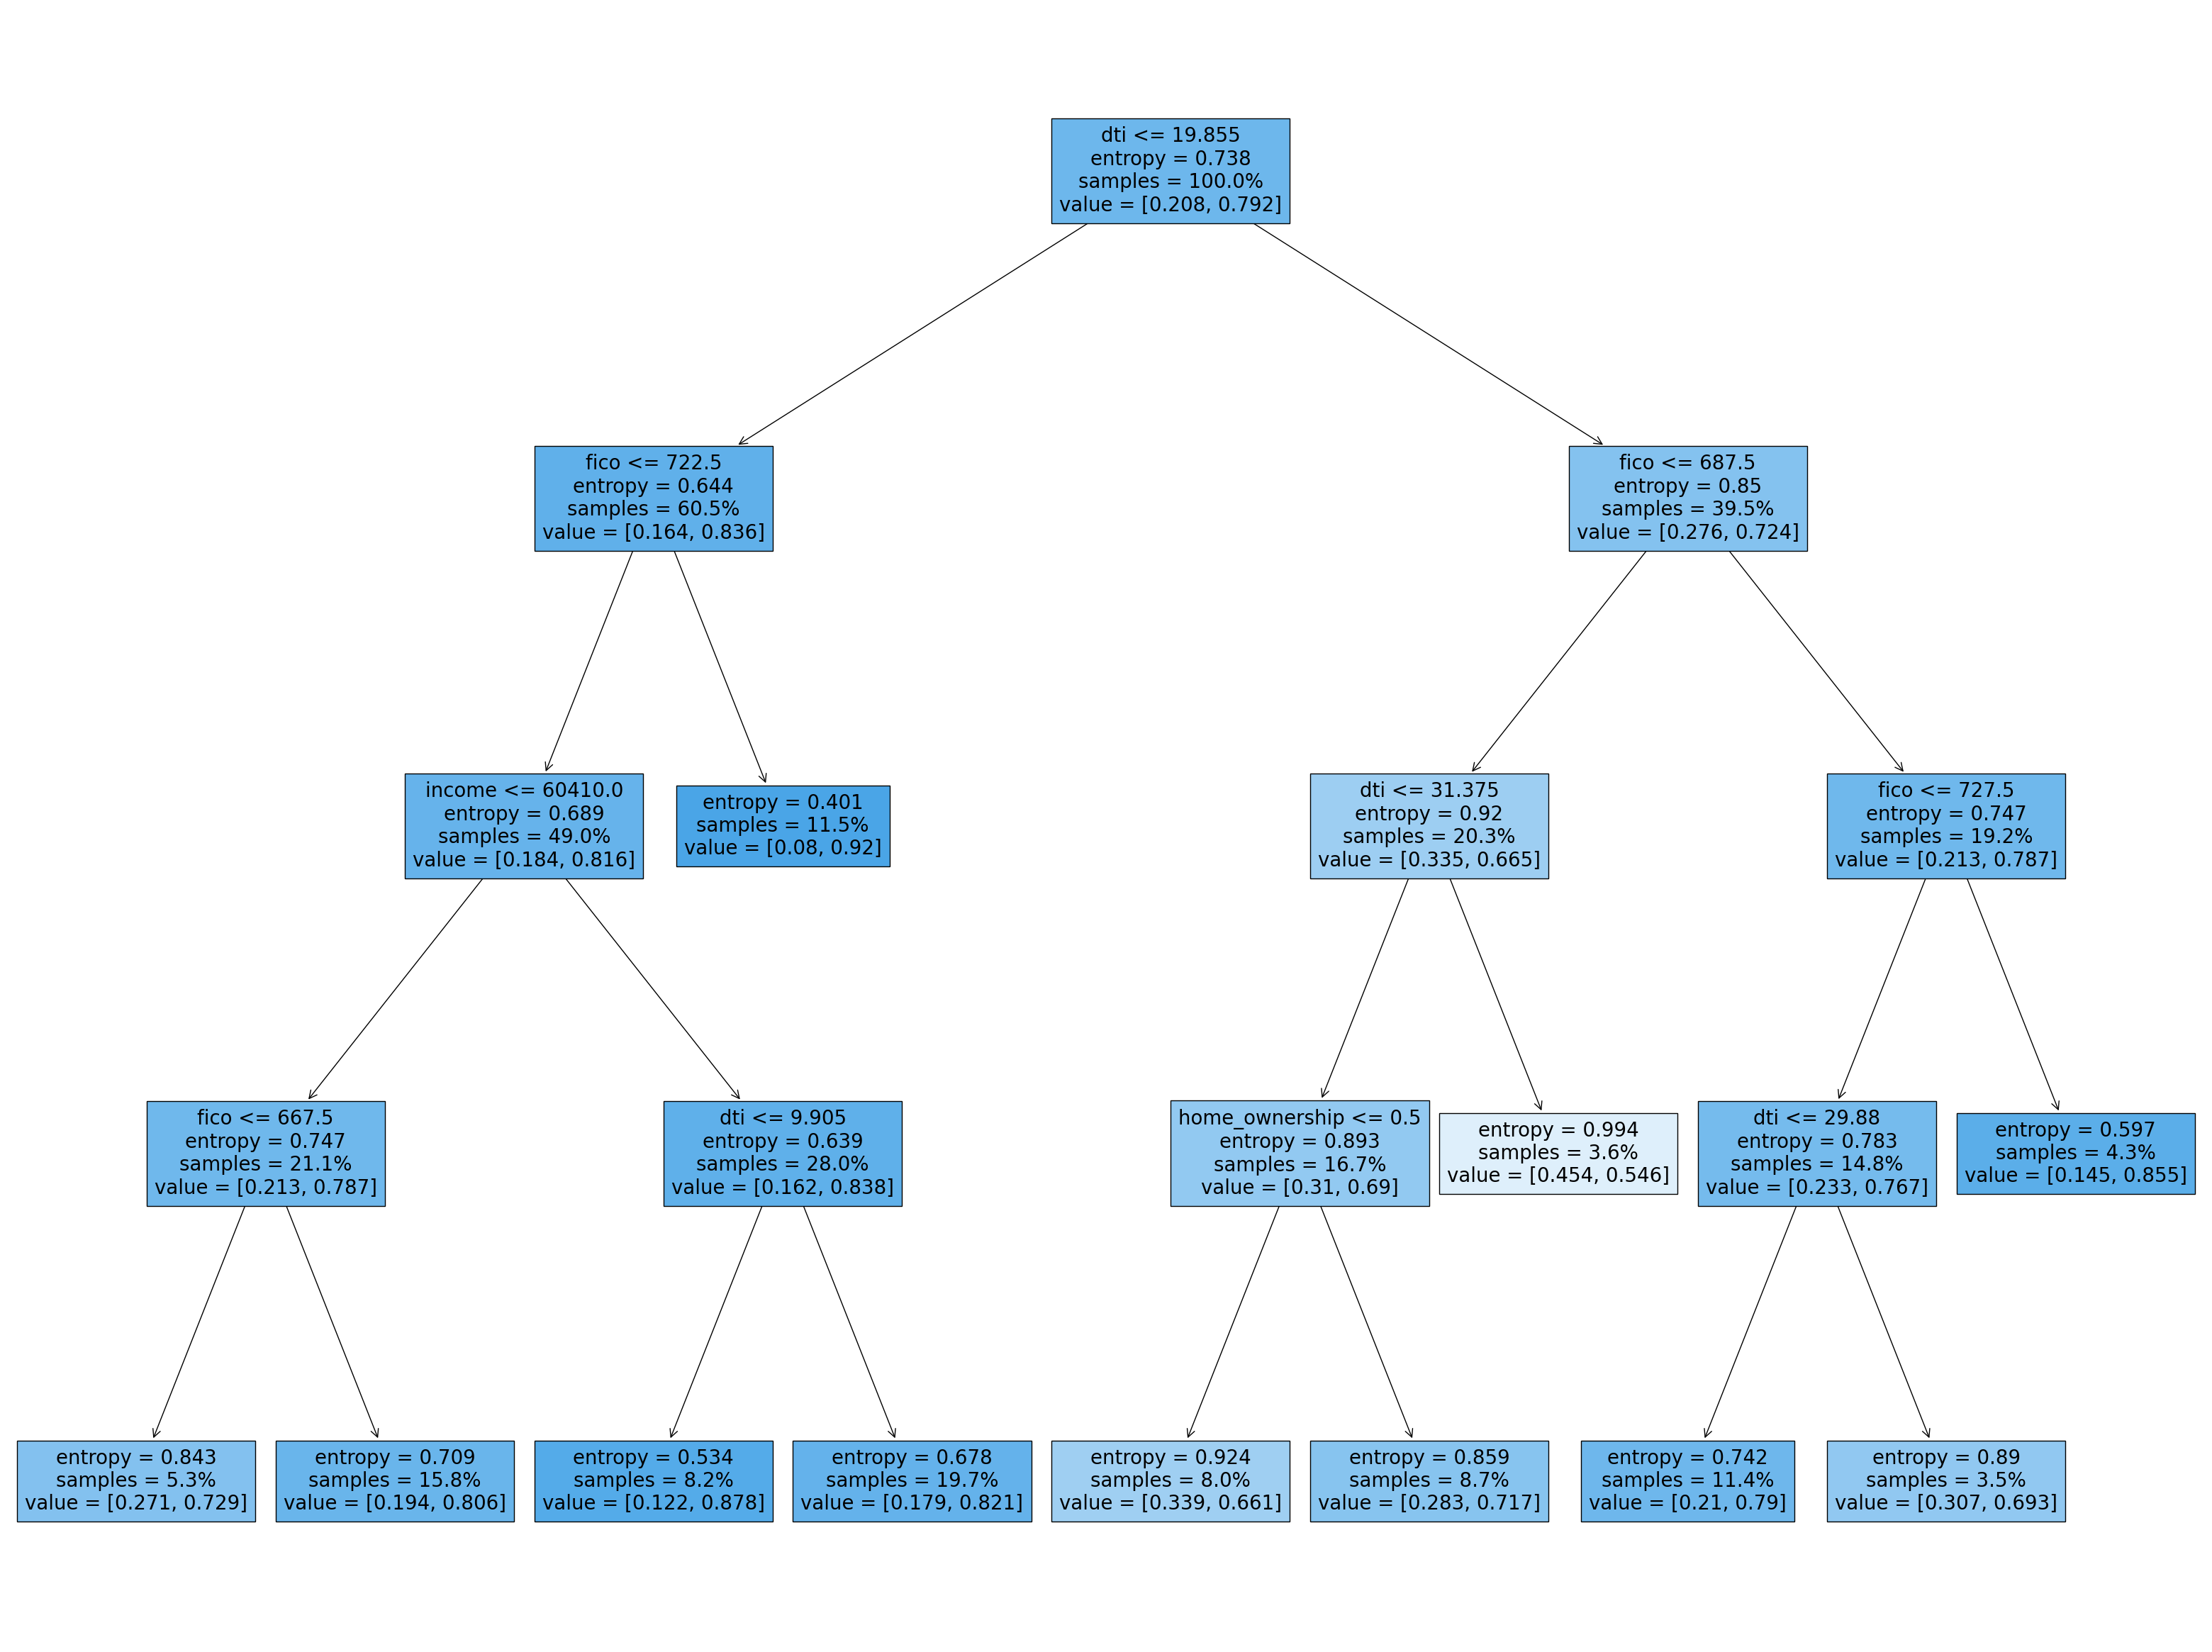

In [30]:
fig, ax = plt.subplots(figsize=(40, 30))
plot_tree(clf, filled=True, feature_names=list(X_train.columns), proportion=True)
plt.show()

In [31]:
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Train_score=',train_score)
print('Test_score=',test_score)

Train_score= 0.7917142857142857
Test_score= 0.7917030567685589
